In [12]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df=pd.read_csv("D:/OWN_PROJECTS/Data_Analysis_Project/IPL_Data_Analysis/IPL Dataset.csv")
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

In [15]:
df['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021], dtype=int64)

In [16]:
df.iloc[0]

match_id                                 335982
season                                     2008
start_date                           2008-04-18
venue                     M.Chinnaswamy Stadium
innings                                       1
ball                                        0.1
batting_team              Kolkata Knight Riders
bowling_team        Royal Challengers Bangalore
striker                              SC Ganguly
non_striker                         BB McCullum
bowler                                  P Kumar
runs_off_bat                                  0
extras                                        1
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     1.0
wicket_type                                    
player_dismissed                               
run                                           1
over                                    

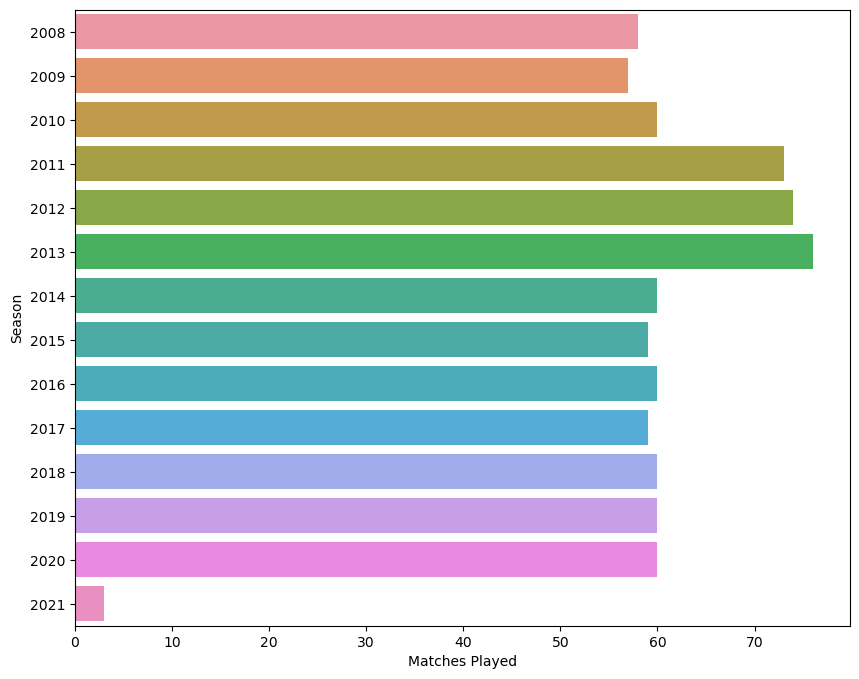

In [17]:
plt.figure(figsize=(10,8))
data = df.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

In [18]:
df.groupby(['venue','match_id']).count().droplevel(level=1).index.value_counts()

M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Arun Jaitley Stadium                                    74
Wankhede Stadium, Mumbai                                74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
SuperSport Park                                         

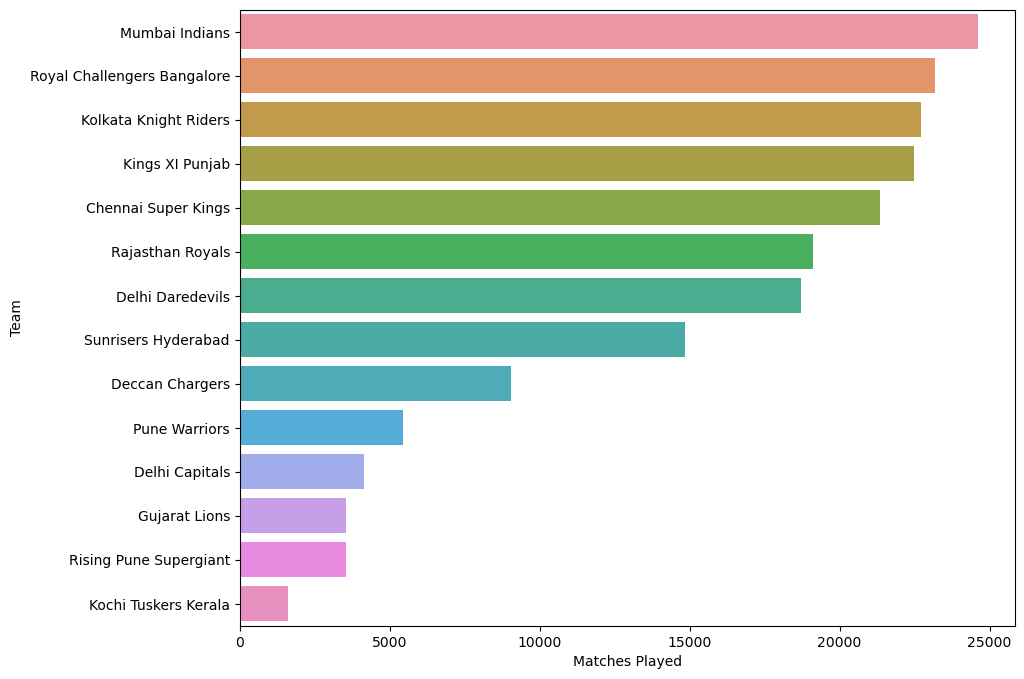

In [19]:
plt.figure(figsize=(10,8))
data = df['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

In [20]:
df.groupby(['batting_team'])['run'].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 32488
Royal Challengers Bangalore    30415
Kings XI Punjab                30064
Kolkata Knight Riders          29606
Chennai Super Kings            28560
Rajasthan Royals               24542
Delhi Daredevils               24296
Sunrisers Hyderabad            19539
Deccan Chargers                11463
Pune Warriors                   6358
Delhi Capitals                  5499
Gujarat Lions                   4862
Rising Pune Supergiant          4533
Kochi Tuskers Kerala            1901
Name: run, dtype: int64

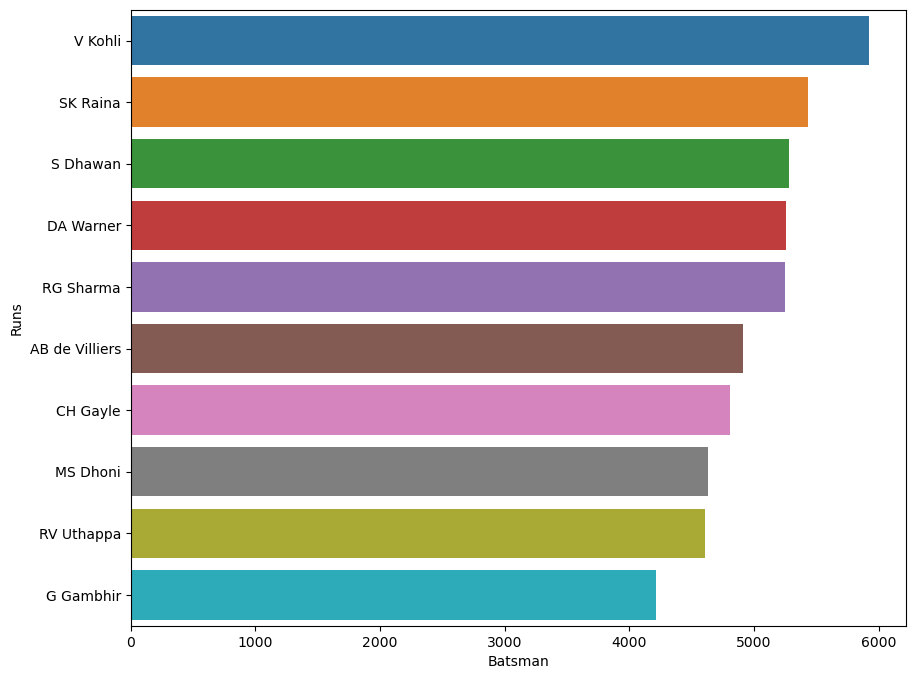

In [21]:
plt.figure(figsize=(10,8))
data = df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

In [22]:
df[df['over']<6].groupby(['match_id','batting_team']).sum()['run'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Delhi Capitals                 48.176471
Sunrisers Hyderabad            47.856000
Rising Pune Supergiant         47.433333
Kings XI Punjab                47.126316
Kolkata Knight Riders          46.409326
Delhi Daredevils               45.714286
Deccan Chargers                45.560000
Mumbai Indians                 45.529412
Chennai Super Kings            45.195531
Rajasthan Royals               44.912500
Royal Challengers Bangalore    44.826531
Pune Warriors                  42.111111
Name: run, dtype: float64

In [23]:
runs = df.groupby(['striker','match_id'])['runs_off_bat'].sum()
runs[runs >= 100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]

striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
Name: runs_off_bat, dtype: int64

In [24]:
data = df.groupby(['season','striker'])['runs_off_bat'].sum().groupby('season').max()
temp_df=pd.DataFrame(df.groupby(['season','striker'])['runs_off_bat'].sum())
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for season,run in data.items():
    player = temp_df.loc[season][temp_df.loc[season]['runs_off_bat'] == run].index[0]
    print(season,'\t ',player,'\t\t',run)

Season    Player              Runs                          
2008 	  SE Marsh 		 616
2009 	  ML Hayden 		 572
2010 	  SR Tendulkar 		 618
2011 	  CH Gayle 		 608
2012 	  CH Gayle 		 733
2013 	  MEK Hussey 		 733
2014 	  RV Uthappa 		 660
2015 	  DA Warner 		 562
2016 	  V Kohli 		 973
2017 	  DA Warner 		 641
2018 	  KS Williamson 		 735
2019 	  DA Warner 		 692
2020 	  KL Rahul 		 676
2021 	  S Dhawan 		 85


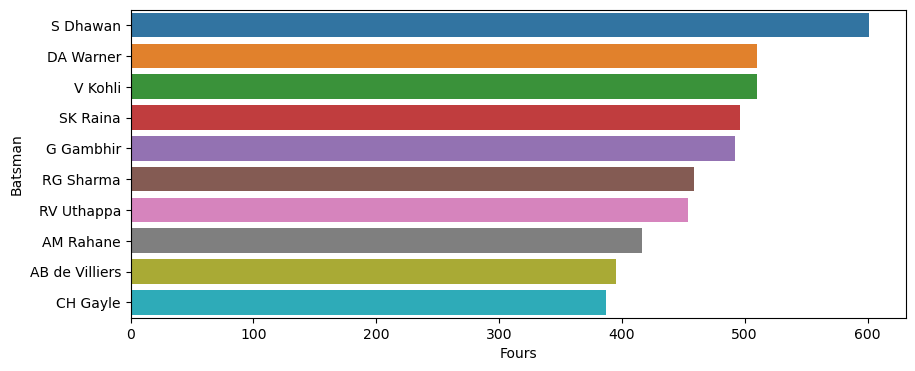

In [25]:
plt.figure(figsize=(10,4))
data = df[df['runs_off_bat'] == 4]['striker'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Fours')
plt.ylabel('Batsman')
plt.show()

In [26]:
df.groupby(['striker','season'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         season
V Kohli         2016      973
DA Warner       2016      848
KS Williamson   2018      735
MEK Hussey      2013      733
CH Gayle        2012      733
                2013      720
DA Warner       2019      692
AB de Villiers  2016      687
RR Pant         2018      684
KL Rahul        2020      676
Name: runs_off_bat, dtype: int64

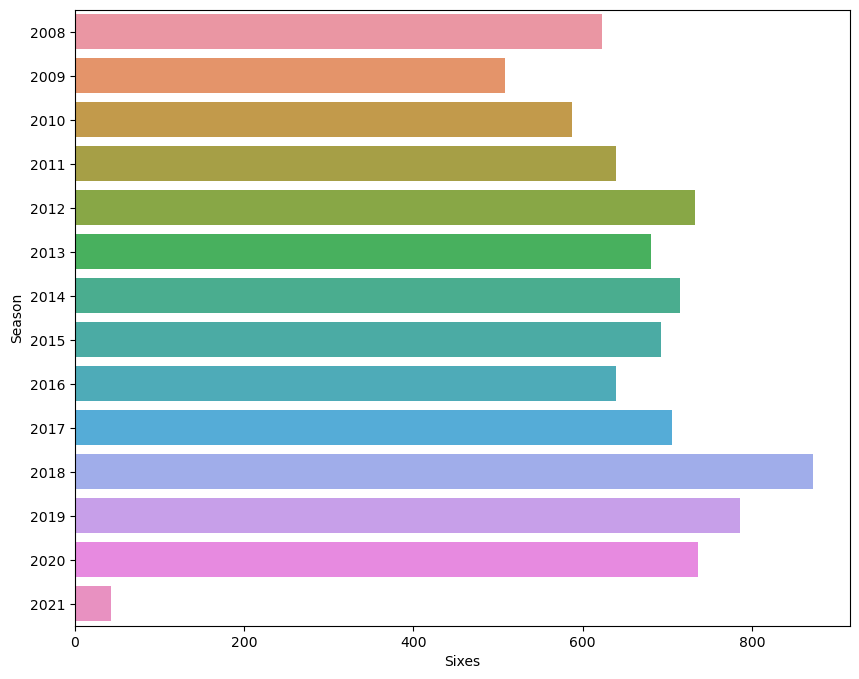

In [27]:
plt.figure(figsize=(10,8))
data = df[df['runs_off_bat'] == 6].groupby('season').count()['match_id'].sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Season')
plt.show()